# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

   Tujuan dari kegiatan ini adalah untuk melakukan analisa pengaruh harga dari suatu mobil yang diiklankan pada Crankshaft List. Terdapat beberapa faktor yang memengaruhi harga dari suatu mobil, yaitu:
- Usia dari kendaraan
- Jarak tempuh yang dimiliki kendaraan pada saat diiklankan
- Kondisi mobil ketika diiklankan
- Tipe transmisi mobil
- Warna mobil

## Pra-pemrosesan

Pertama dilakukan pemanggilan untuk library - library yang dibutuhkan dalam pengerjaan proyek ini.

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Memuat Data

Dilakukan pemuatan data ke dalam proyek ini.

In [3]:
# Muat file data menjadi DataFrame
try:
    cars = pd.read_csv('/datasets/vehicles_us.csv')
except:
    cars = pd.read_csv('C:/Users/ASUS/vehicles_us.csv')

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 


In [4]:
# tampilkan informasi/rangkuman umum tentang DataFrame
cars.info()
cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# tampilkan sampel data
cars.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Dari cuplikan data diatas, terdapat data NaN dalam kolom `odometer`, `paint_color`, dan `is_4wd`. Selain itu, terdapat beberapa nilai yang memperlihatkan nilai koma, sehingga perlu dilihat tipe data dan seberap banyak nilai hilang tiap kolom lebih lanjut. 

In [6]:
cars.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

Pada kolom `model_year`, `cylinders`, dan `is_4wd` adalah data bersifat float. Seharusnya `model_year` dan `cylinders` bisa menjadi interger. Lalu untuk kolom `is_4wd` bisa diubah menjadi boolean. Terakhir, kolom `date_posted` bisa diubah menjadi datetime.

In [7]:
cars.isna().sum().sort_values(ascending=False)/cars.shape[0] *100

is_4wd          50.369723
paint_color     17.985444
odometer        15.316836
cylinders       10.208637
model_year       7.023775
price            0.000000
model            0.000000
condition        0.000000
fuel             0.000000
transmission     0.000000
type             0.000000
date_posted      0.000000
days_listed      0.000000
dtype: float64

Untuk melihat apakah nilai yang hilang bersifat acak atau terdapat suatu pola, perlu dilakukan identifikasi terlebih dahulu.

In [8]:
cars[cars['paint_color'].isnull()]['type'].value_counts(normalize=True)

SUV            0.241286
sedan          0.236215
truck          0.230387
pickup         0.143196
coupe          0.043811
wagon          0.028920
hatchback      0.022985
mini-van       0.021798
van            0.014028
convertible    0.008093
other          0.004856
offroad        0.003885
bus            0.000540
Name: type, dtype: float64

In [9]:
cars['type'].value_counts(normalize=True)

SUV            0.240757
truck          0.239748
sedan          0.235885
pickup         0.135623
coupe          0.044697
wagon          0.029908
mini-van       0.022533
hatchback      0.020320
van            0.012285
convertible    0.008656
other          0.004968
offroad        0.004153
bus            0.000466
Name: type, dtype: float64

In [10]:
cars[cars['is_4wd'].isnull()]['transmission'].value_counts(normalize=True)

automatic    0.904751
manual       0.062536
other        0.032713
Name: transmission, dtype: float64

In [11]:
cars['transmission'].value_counts(normalize=True)

automatic    0.910277
manual       0.054905
other        0.034818
Name: transmission, dtype: float64

Terdapat 5 kolom yang memiliki nilai data hilang, yakni `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`, dengan kolom `is_4wd` yang paling banyak nilai yang hilang dan kolom `model_year` yang paling sedikit. Dari hasil analisis nilai yang hilang, dapat terlihat bahwa nilai yang hilang bukan merupakan nilai yang memiliki suatu pola, melainkan bersifat acak.

### Kesimpulan dan Langkah-Langkah Selanjutnya

Dari data yang diperoleh, terdapat nilai - nilai yang tidak normal, sehingga perlu dilakukan modifikasi akan data lebih lanjut agar data bisa diolah lebih lanjut. Pertama akan dilakukan pengisian nilai - nilai yang hilang. Untuk kolom `model_year`, `paint_color`dan `cylinders` dapat diisi dengan tahun produksi dari model yang memiliki nama yang sama namun memiliki nilai. Untuk kolom `odometer` akan diisi dengan nilai rata - rata dari odometer seluruh data. Terakhir untuk kolom `is_4wd`, nilai yang hilang akan diganti dengan 0 agar bisa diubah menjadi tipe data interger. Nilai - nilai yang hilang ini bisa disebabkan karena human error dikarenakan jumlah nilai yang hilang ini berbeda untuk tiap kolom, kecuali untuk kolom `is_4wd` yang nilainya kosong untuk menunjukan bahwa mobil tersebut buka tipe 4WD.

Setelah itu dilakukan perubahan tipe data untuk kolom `model_year` dan `cylinders` menjadi interger dan `is_4wd` menjadi boolean.

## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

Pertama dilakukan pengisian untuk kolom `model_year` dan `cylinders`. Pengisian kolom ini adalah dengan cara mengelompokan setiap model mobil, lalu menghitung mobil yang memiliki tahun yang sama, lalu diambil nilai yang memiliki tingkat kemunculan nilai yang tinggi.

In [12]:
#pengisian kolom model_year
#memakai fungsi
def filling_values(model, missing_value):
    model_filling=(cars
                    #pengelompokan terhadap model mobil & memanggil kolom 'model_year'
                    .groupby(model)[missing_value] 
                    #membuat fungsi yakni menghitung jumlah mobil yang memiliki tahun yang sama dan mengambil nilai tertinggi
                    .agg(lambda x: x.value_counts().index[0])
                   )
    #mengisi nilai kosong pada 'model_year'
    cars[missing_value] = cars[missing_value].fillna(
    #melakukan mapping nilai model terhadap model_year_filling
        cars[model].map(model_filling)
    )
filling_values('model', 'model_year')

In [13]:
#melakukan pengecekan apakah kolom 'model_year' telah terisi semua
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Setelah mengisi kolom `model_year`, pengisian kolom `cylinders` menggunakan metode yang sama

In [14]:
#pengisian kolom cylinders dan paint_color dengan menggunakan fungsi diatas
filling_values('model', 'cylinders')

In [15]:
#pengecekan kembali
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Untuk `paint_color`, untuk mencegah kerancuan ketika dilakukan analisis lebih lanjut, maka nilai yang hilang pada `paint_color` akan diganti menjadi 'other'. Hal ini disebabkan adalah walaupun bisa untuk dilakukan memasukan warna yang paling umum pada masing - masing kendaraan seperti pada proses pemasukan data yang hilang pada `model_year` dan `cylinders`, namun dirasa kurang tepat dikarenakan nilai data yang hilang sekitar 18%, dan warna merupakan suatu preferensi dari masing - masing pemilik kendaraan, bukan suatu fakta yang bisa diambil seperti tahun produksi atau silinder mobil.

In [16]:
cars['paint_color'] = cars['paint_color'].fillna('other')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Untuk pengisian kolom `odometer` dilakukan pengisian dengan melihat rata - rata dari nilai odometer tiap tahun produksi mobil. Hal ini dilakukan karena apabila hanya melihat dari model mobil saja seperti untuk pengerjaan 3 kolom diatas, akan dirasa tidak adil dikarenakan terdapat beberapa mobil yang memiliki tahun produksi yang berbeda. Pendekatan dengan melihat rata - rata tiap tahun produksi mobil akan lebih tepat.

In [17]:
#mencari rata - rata dari tiap tahun produksi dan mengganti nilai yang hilang
odometer_mean = cars.groupby('model_year')['odometer'].mean()
cars['odometer'] = cars['odometer'].fillna(
    cars['model_year'].map(odometer_mean)
)
#mengecek apakah masih terdapat nilai yang hilang
cars[cars['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


Ternyata masih terdapat 1 nilai yang hilang. Namun penelusuran lebih lanjut menyebutkan bahwa nilai yang hilang ini dianggap tidak wajar. Tidak ada ford f-150 yang diproduksi pada tahun 1929. Mobil ford f-150 baru diperkenalkan ke publik pada rentang tahun 1973 - 1979, dari sumber [ini](https://en.wikipedia.org/wiki/Ford_F-Series#Sixth_generation_(1973%E2%80%931979)). Sehingga nilai ini bisa dihilangkan untuk mencegah kerancuan lebih lanjut.

In [18]:
cars = cars.dropna(subset=['odometer']).reset_index(drop=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51524 entries, 0 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51524 non-null  int64  
 1   model_year    51524 non-null  float64
 2   model         51524 non-null  object 
 3   condition     51524 non-null  object 
 4   cylinders     51524 non-null  float64
 5   fuel          51524 non-null  object 
 6   odometer      51524 non-null  float64
 7   transmission  51524 non-null  object 
 8   type          51524 non-null  object 
 9   paint_color   51524 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51524 non-null  object 
 12  days_listed   51524 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Terakhir dari nilai yang hilang ada mengisi nilai pada `is_4wd`. Seperti yang telah disebutkan diatas, nilai yang hilang ini adalah karena kolom ini seharusnya adalah boolean yang menjawab iya (true) atau tidak (false) saja. Untuk sekarang diubah nilai yang hilang ini dengan 0 dan bisa diubah menjadi boolean.

In [19]:
cars['is_4wd'] = cars['is_4wd'].fillna(0).astype(bool)
cars.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd             bool
date_posted      object
days_listed       int64
dtype: object

Terakhir dilakukan pengecekan apakah terdapat data duplikat atau tidak

In [20]:
cars.duplicated().sum()

0

Tidak terdapat data duplikat, sehingga dapat dilakukan proses pemrosesan data berikutnya

## Memperbaiki Tipe Data

Setelah mengatasi nilai yang hilang, dilakukan perubahan tipe data untuk kolom `model_year` dan `cylinders` menjadi interger dan untuk kolom `date_posted` menjadi datetime.

In [25]:
#mengubah tipe data model_year dan cyinders
cars[['model_year', 'cylinders']] = cars[['model_year','cylinders']].astype(int)

In [26]:
#mengubah tipe data date_posted dan mengecek hasil perubahan tipe data
cars['date_posted'] = pd.to_datetime(cars['date_posted'])
cars.dtypes

price                    int64
model_year               int32
model                   object
condition               object
cylinders                int32
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

## Memperbaiki Kualitas Data

Agar data lebih mudah dianalisis, perlu ditambahkan beberapa kolom yang menunjang kegiatan. Penambahan kolom ini adalah hari dalam minggu, bulan, dan tahun ketika iklan ditayangkan, usia kendaraan, dan jarak tempuh kendaraan per tahun

In [27]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
cars['day_posted'] = cars['date_posted'].dt.dayofweek
cars['week_posted'] = cars['date_posted'].dt.month
cars['year_posted'] = cars['date_posted'].dt.year
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,5,6,2018
1,25500,2013,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,161160.333599,automatic,pickup,other,False,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019


In [28]:
# Tambahkan usia kendaraan saat iklan ditayangkan
cars['age'] = cars['year_posted'] - cars['model_year']
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,year_posted,age
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,5,6,2018,7
1,25500,2013,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,4,10,2018,5
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,161160.333599,automatic,pickup,other,False,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2


In [29]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun
def milage_per_year(odo, age):
    if age > 0:
        return odo/age
    else:
        return odo
cars['milage_per_year'] = cars.apply(lambda x: milage_per_year(x.odometer, x.age), axis = 1)
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,year_posted,age,milage_per_year
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2013,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,4,10,2018,5,17741.000000
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,fair,8,gas,161160.333599,automatic,pickup,other,False,2019-03-22,9,4,3,2019,16,10072.520850
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000


In [30]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
def cars_condition(cond):
    if cond == 'new':
        return 5
    elif cond == 'like new':
        return 4
    elif cond == 'excellent':
        return 3
    elif cond == 'good':
        return 2
    elif cond == 'fair':
        return 1
    elif cond == 'salvage':
        return 0
    else:
        return 'error'
cars['condition_number'] = cars['condition'].apply(cars_condition)
cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,year_posted,age,milage_per_year,condition_number
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,other,True,2018-06-23,19,5,6,2018,7,20714.285714,2
1,25500,2013,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,True,2018-10-19,50,4,10,2018,5,17741.000000,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333,4
3,1500,2003,ford f-150,fair,8,gas,161160.333599,automatic,pickup,other,False,2019-03-22,9,4,3,2019,16,10072.520850,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000,3


## Memeriksa Data yang Sudah Bersih

Setelah data dibersihkan, dilakukan pemeriksaan untuk memastikan bahwa data siap untuk proses selanjutnya

In [31]:
# tampilkan informasi/rangkuman umum tentang DataFrame
cars.info()
cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51524 entries, 0 to 51523
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51524 non-null  int64         
 1   model_year        51524 non-null  int32         
 2   model             51524 non-null  object        
 3   condition         51524 non-null  object        
 4   cylinders         51524 non-null  int32         
 5   fuel              51524 non-null  object        
 6   odometer          51524 non-null  float64       
 7   transmission      51524 non-null  object        
 8   type              51524 non-null  object        
 9   paint_color       51524 non-null  object        
 10  is_4wd            51524 non-null  bool          
 11  date_posted       51524 non-null  datetime64[ns]
 12  days_listed       51524 non-null  int64         
 13  day_posted        51524 non-null  int64         
 14  week_posted       5152

,price,model_year,cylinders,odometer,days_listed,day_posted,week_posted,year_posted,age,milage_per_year,condition_number
count,51524.00000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
mean,12132.35104,2009.874796,6.121458,115526.755183,39.554382,3.005376,6.628406,2018.307468,8.432672,18353.929508,2.637548
std,10040.86718,6.134657,1.657292,61844.439614,28.204413,1.997735,3.474115,0.461450,6.148167,13390.053516,0.712449
min,1.00000,1908.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.00000,2007.000000,4.000000,73289.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10910.181818,2.000000
50%,9000.00000,2011.000000,6.000000,113701.500000,33.000000,3.000000,7.000000,2018.000000,7.000000,15394.000000,3.000000
75%,16836.00000,2014.000000,8.000000,151480.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,21933.012500,3.000000
max,375000.00000,2019.000000,12.000000,990000.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


In [32]:
# tampilkan sampel data 
cars.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,year_posted,age,milage_per_year,condition_number
41382,9900,2016,toyota camry,excellent,4,gas,126000.0,automatic,sedan,grey,False,2019-04-13,13,5,4,2019,3,42000.000000,3
14531,7890,2007,ford f150 supercrew cab xlt,excellent,6,gas,173749.0,automatic,truck,blue,False,2018-05-24,58,3,5,2018,11,15795.363636,3
4093,11999,2013,honda cr-v,excellent,4,gas,152654.0,automatic,SUV,black,True,2019-01-18,49,4,1,2019,6,25442.333333,3
22974,13985,2015,honda accord,good,4,gas,61156.0,automatic,sedan,custom,False,2019-02-21,10,3,2,2019,4,15289.000000,2
33735,23995,2012,jeep wrangler,like new,6,gas,56167.0,automatic,SUV,other,True,2019-01-24,19,3,1,2019,7,8023.857143,4


## Mempelajari Parameter Inti 
Selanjutnya dilakukan analisis akan parameter yang dapat memengaruhi harga mobil. Kegiatan ini bertujuan untuk melihat apakah terdapat outlier yang dapat mengganggu kegiatan analisis.

Parameternya adalah 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

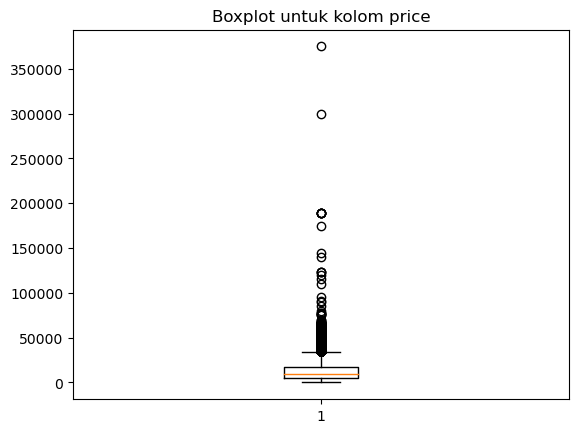

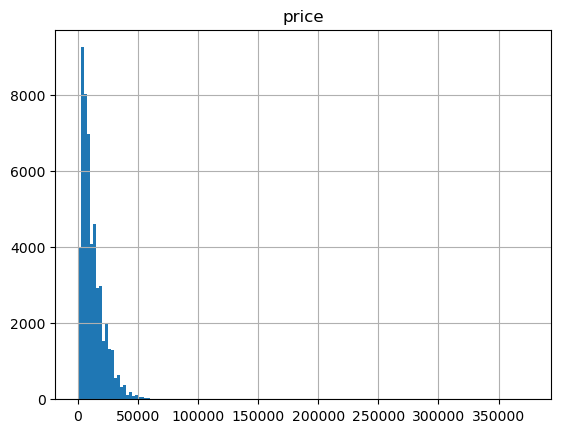

In [33]:
#boxplot + histogram untuk parameter harga
plt.boxplot(cars['price'])
plt.title('Boxplot untuk kolom price')
print()
cars.hist('price', bins=150)
plt.show()

Dari gambar boxplot diatas, dapat terlihat bahwa terdapat banyak outliers. Hal ini tergambarkan dengan rendah boxplot dan whiskers pada rentang 0-50000 namun masih banyak nilai untuk rentang diatas 50000. Dari histogram dapat terlihat bahwa mayoritas harga mobil yang teriklankan berada pada rentang harga 0-50000, sehingga boxplot yang telah digambarkan berada pada rentang 0-50000.

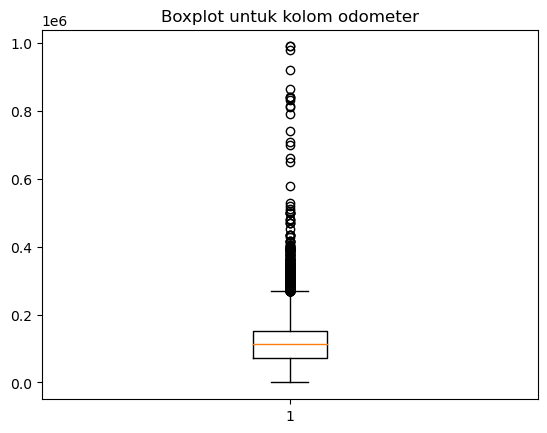

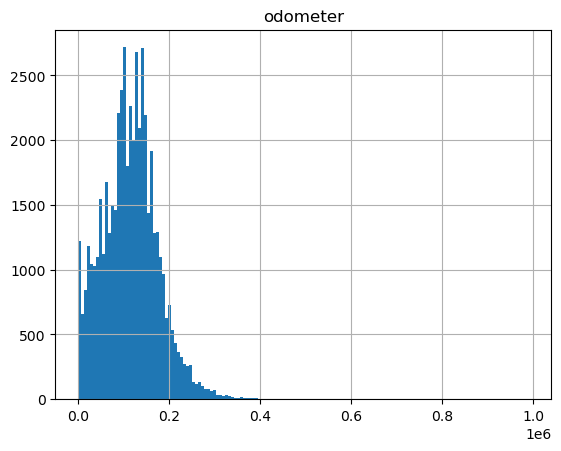

In [34]:
#boxplot + histogram untuk parameter jarak tempuh
plt.boxplot(cars['odometer'])
plt.title('Boxplot untuk kolom odometer')
print()
cars.hist('odometer', bins=150)
plt.show()

Dari boxplot dan histogram, dapat terlihat bahwa banyak mobil yang terjual memiliki odometer pada rentang 0 - 300000 km, dengan outlier kurang lebih setelah 30000 km.

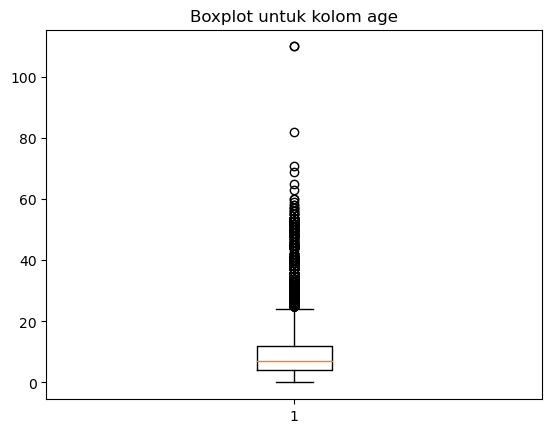

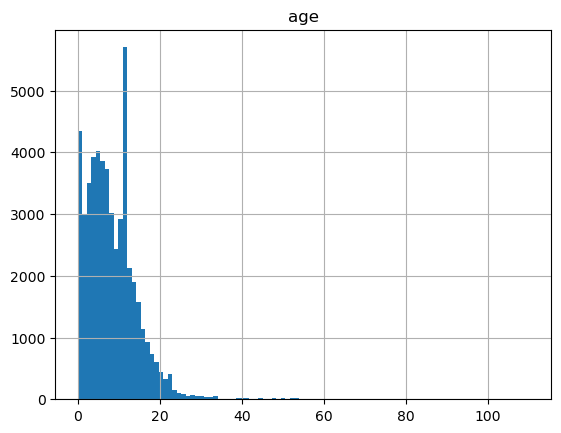

In [35]:
#boxplot untuk parameter odometer
plt.boxplot(cars['age'])
plt.title('Boxplot untuk kolom age')
print()
cars.hist('age', bins=100)
plt.show()

Dari boxplot dan histogram, dapat terlihat bahwa banyak mobil yang dijual memiliki umur rentang 0 - 20 tahun. Namun banyak juga outlier diatas  dari boxplot, yakni sekitar lebih dari 20 tahun. 

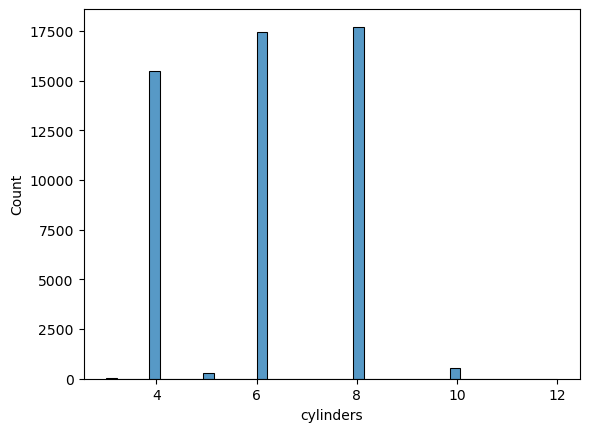

In [69]:
#melihat pesebaran data untuk silinder mobil
sns.histplot(cars['cylinders'])
plt.show()

Penggunaan countplot pada seaborn membantu visualisasi lebih baik. Dapat terlihat bahwa terdapat banyak mobil yang memiliki silinder 4, 6, dan 8. Walau memang nilai untuk 3, 5, 10, dan 12 silinder kecil, namun hal ini bukanlah outlier. Karena memang terdapat mobil yang memiliki [3 silinder](https://www.goodwood.com/grr/road/news/2022/7/the-best-three-cylinder-engines/), [5 silinder](https://en.wikipedia.org/wiki/Straight-five_engine), [10 silinder](https://en.wikipedia.org/wiki/V10_engine), maupun [12 silinder](https://en.wikipedia.org/wiki/V12_engine)

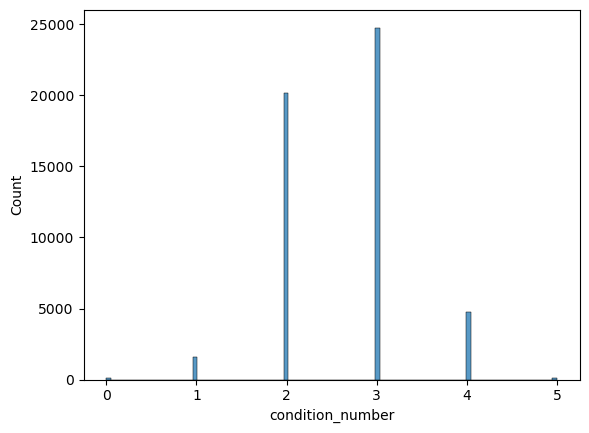

In [70]:
#melihat pesebaran data untuk kondisi mobil
sns.histplot(cars['condition_number'])
plt.show()

Dari grafik countplot, dapat terlihat bahwa banyak mobil yang dijual pada iklan memiliki kondisi 'good' dan 'fair'. Hal ini wajar mengingat mobil yang dijual berada pada lapak mobil bekas pakai.

## Mempelajari dan Menangani Outlier

Dari hasil analisis data, dapat terlihat bahwa terdapat 3 outlier, yakni `price`, `odometer`, dan `age`. Sehingga langkah berikutnya adalah menyingkirkan data - data outlier.

In [38]:
# Tentukan batas bawah outlier 
def outliers_cars_lower(column):
    q1 = cars[column].quantile(0.25)
    q3 = cars[column].quantile(0.75)
    IQR = q3 - q1
    return q1 - 1.5 * IQR
columns = ('price', 'age', 'odometer')
for column_name in columns:
    print('batas bawah outlier', column_name, 'adalah', outliers_cars_lower(column_name))

batas bawah outlier price adalah -12754.0
batas bawah outlier age adalah -8.0
batas bawah outlier odometer adalah -43997.5


Dari fungsi, dapat dilihat bahwa batas bawah outlier untuk kolom `price`, `odometer`, dan `age` bernilai negatif. Padahal, nilai minimum untuk kolom - kolom diatas tidak bernilai negatif. 

In [39]:
# Tentukan batas atas outlier 
def outliers_cars_upper(column):
    q1 = cars[column].quantile(0.25)
    q3 = cars[column].quantile(0.75)
    IQR = q3 - q1
    return q3 + 1.5 * IQR
columns = ('price', 'age', 'odometer')
for column_name in columns:
    print('batas atas outlier', column_name, 'adalah', outliers_cars_upper(column_name))

batas atas outlier price adalah 34590.0
batas atas outlier age adalah 24.0
batas atas outlier odometer adalah 268766.5


In [40]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
cars_price_clean = cars[(cars['price']>outliers_cars_lower('price')) & 
                              (cars['price']<outliers_cars_upper('price'))].reset_index(drop=True)
cars_price_age_clean = cars_price_clean[(cars_price_clean['age']>outliers_cars_lower('age')) & 
                                        (cars_price_clean['age']<outliers_cars_upper('age'))].reset_index(drop=True)
cars_clean = cars_price_age_clean[(cars_price_age_clean['odometer']>outliers_cars_lower('odometer')) & 
                                    (cars_price_age_clean['odometer']<outliers_cars_upper('odometer'))].reset_index(drop=True)
cars_clean.info()
cars_clean.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48355 entries, 0 to 48354
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             48355 non-null  int64         
 1   model_year        48355 non-null  int32         
 2   model             48355 non-null  object        
 3   condition         48355 non-null  object        
 4   cylinders         48355 non-null  int32         
 5   fuel              48355 non-null  object        
 6   odometer          48355 non-null  float64       
 7   transmission      48355 non-null  object        
 8   type              48355 non-null  object        
 9   paint_color       48355 non-null  object        
 10  is_4wd            48355 non-null  bool          
 11  date_posted       48355 non-null  datetime64[ns]
 12  days_listed       48355 non-null  int64         
 13  day_posted        48355 non-null  int64         
 14  week_posted       4835

,price,model_year,cylinders,odometer,days_listed,day_posted,week_posted,year_posted,age,milage_per_year,condition_number
count,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000,48355.000000
mean,11230.462289,2010.185999,6.053562,114820.561999,39.537814,3.003019,6.635653,2018.306276,8.120277,18281.510589,2.635301
std,7823.777087,5.035066,1.657226,55330.610567,28.207021,1.996686,3.472417,0.460951,5.047392,12614.779676,0.698463
min,1.000000,1995.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,4999.000000,2007.000000,4.000000,76633.500000,19.000000,1.000000,3.000000,2018.000000,4.000000,11090.909091,2.000000
50%,8995.000000,2011.000000,6.000000,115000.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15367.200000,3.000000
75%,15990.000000,2014.000000,8.000000,151429.168182,53.000000,5.000000,10.000000,2019.000000,12.000000,21666.666667,3.000000
max,34555.000000,2019.000000,12.000000,268700.000000,271.000000,6.000000,12.000000,2019.000000,23.000000,213539.000000,5.000000


## Mempelajari Parameter Inti Tanpa Outlier

Setelah data telah dibersihkan dari outlier, lalu akan dibandingkan data sebelum dan sesudah outlier dibersihkan. Perbandingan ini menggunakan metode membandingkan boxplot dan histogram pada kolom `price`, `age`, dan `odometer`. 

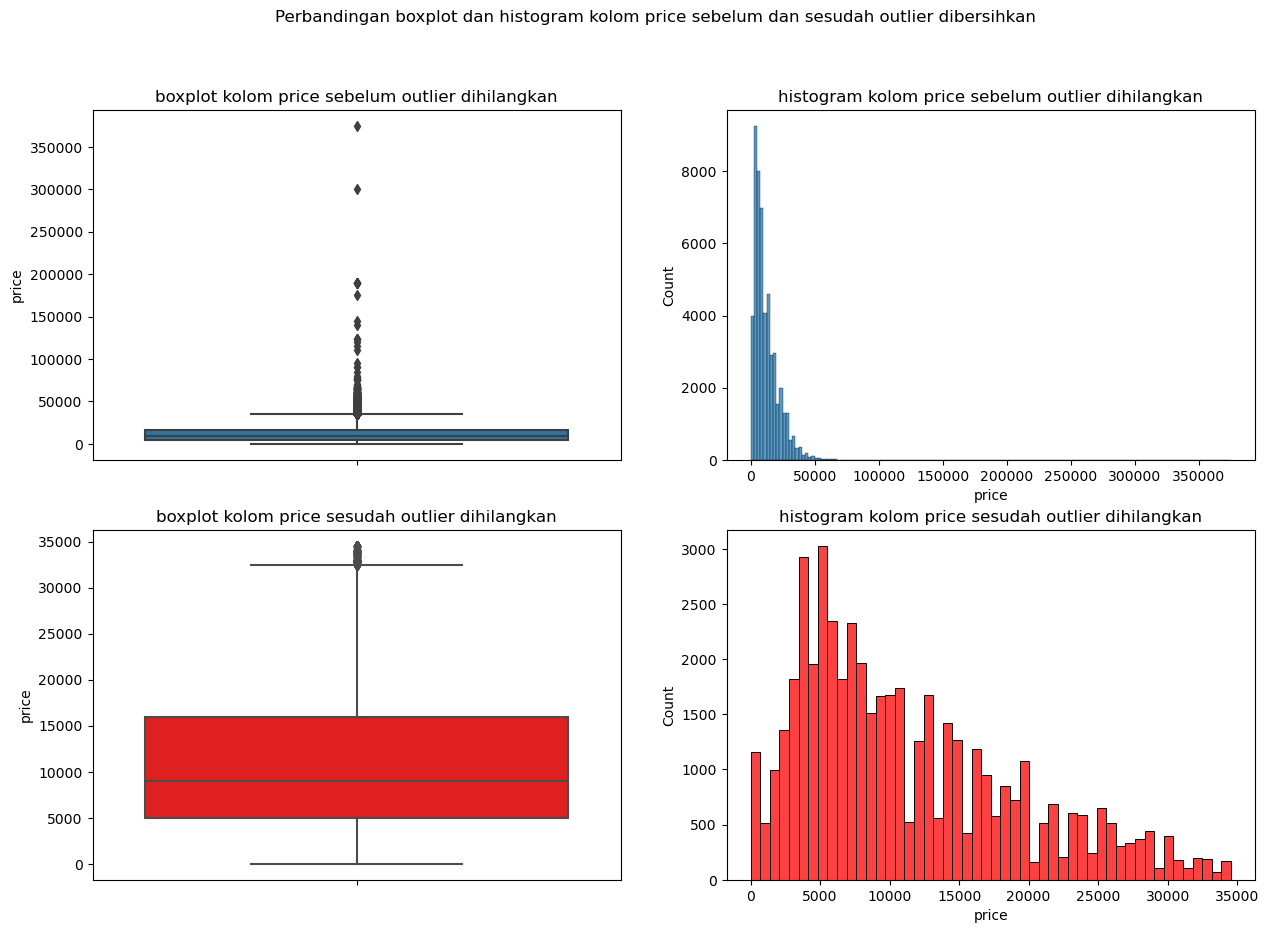

In [41]:
#plot grafik boxplot dan histogram untuk kolom price sebelum dan sesudah outiler dihilangkan
fig, axes = plt.subplots(2,2, figsize = (15, 10))
fig.suptitle('Perbandingan boxplot dan histogram kolom price sebelum dan sesudah outlier dibersihkan')
sns.boxplot(ax=axes[0,0], data=cars, y='price')
axes[0,0].set_title('boxplot kolom price sebelum outlier dihilangkan')
sns.histplot(ax=axes[0,1], data=cars, x='price', bins=150)
axes[0,1].set_title('histogram kolom price sebelum outlier dihilangkan')
sns.boxplot(ax=axes[1,0], data=cars_clean, y='price', color='red')
axes[1,0].set_title('boxplot kolom price sesudah outlier dihilangkan')
sns.histplot(ax=axes[1,1], data=cars_clean, x='price', bins=50, color='red')
axes[1,1].set_title('histogram kolom price sesudah outlier dihilangkan')
plt.show()

Dari gambar diatas, dapat terlihat perbedaan boxplot dan histogram sebelum dan sesudah outlier pada kolom `price` dihilangkan. Sebelum outlier dihilangkan, terdapat banyak outlier pada rentang harga diatas 50000, dengan mayoritas data berada pada rentang 0-50000. Sesudah outlier dihilangkan, data yang bersih menunjukan bahwa memang masih terdapat outlier pada rentang harga diatas 30000, namun hal ini lumrah mengingat bahwa boxplot akan melakukan perhitungan boxplot dan whisker setelah outliers dibersihkan dan akan ada outliers baru hasil dari perhitungan baru ini. Outliers yang baru ini memiliki distribusi yang lebih baik dibandingkan outliers lama. Histogram baru menunjukan persebaran data yang lebih baik dibandingkan histogram data lama.

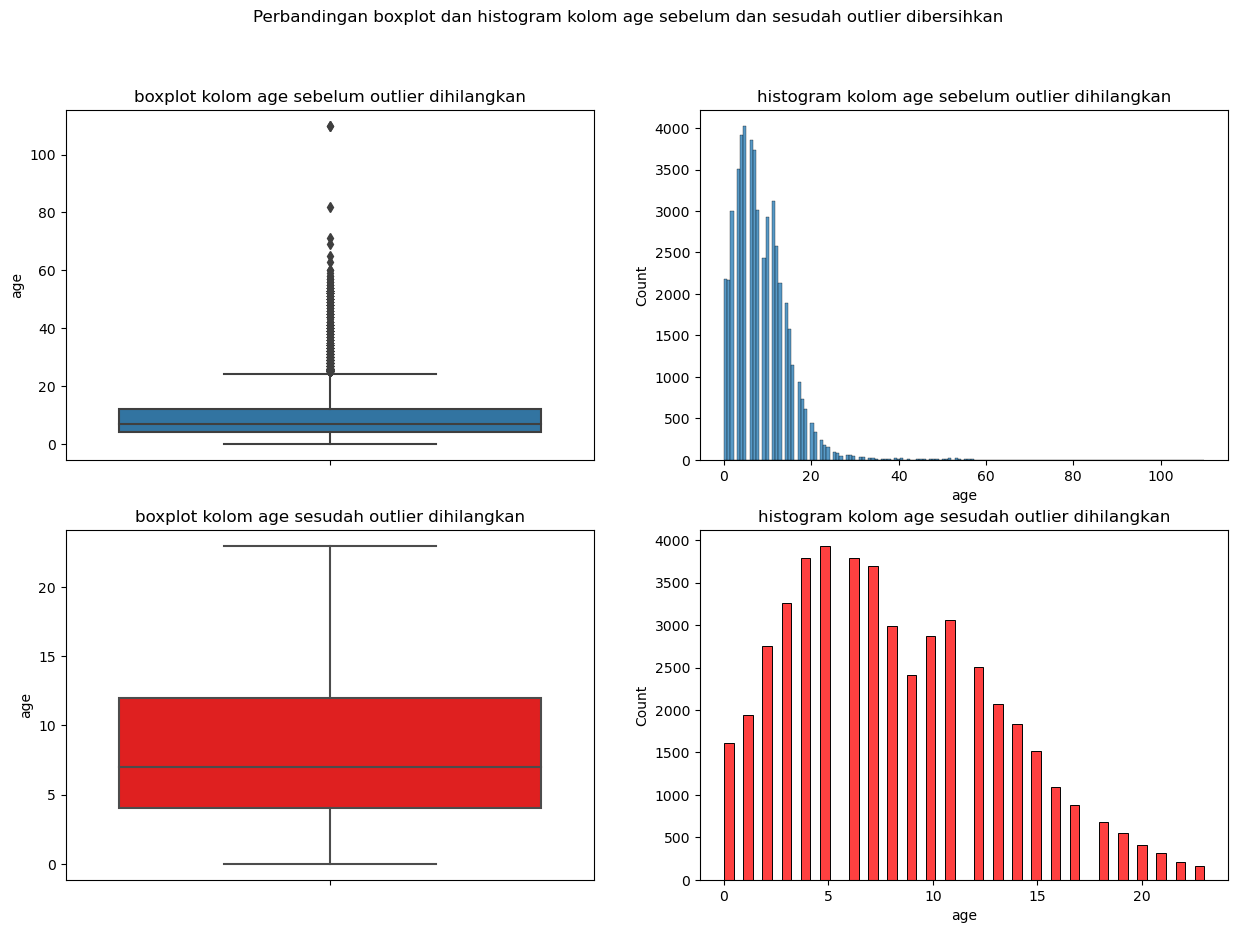

In [42]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))
fig.suptitle('Perbandingan boxplot dan histogram kolom age sebelum dan sesudah outlier dibersihkan')
sns.boxplot(ax=axes[0,0], data=cars, y='age')
axes[0,0].set_title('boxplot kolom age sebelum outlier dihilangkan')
sns.histplot(ax=axes[0,1], data=cars, x='age', bins=150)
axes[0,1].set_title('histogram kolom age sebelum outlier dihilangkan')
sns.boxplot(ax=axes[1,0], data=cars_clean, y='age', color='red')
axes[1,0].set_title('boxplot kolom age sesudah outlier dihilangkan')
sns.histplot(ax=axes[1,1], data=cars_clean, x='age', bins=50, color='red')
axes[1,1].set_title('histogram kolom age sesudah outlier dihilangkan')
plt.show()

Hal yang sama juga terlihat dari boxplot dan histogram untuk kolom `age`. Dapat terlihat sebelum data outliers dibersihkan, boxplot menunjukan terdapat banyak outliersuntuk rentang diatas 20 tahun dan histogram menunjukan bahwa mayoritas data berada pada umur kurang lebih 20 tahun. Setelah data dibersihkan, terlihat bahwa tidak ada outliers pada boxplot dan sebaran histogram nya menunjukan distribusi yang lebih baik. Dari histogram untuk data outliers yang telah dibersihkan, dapat dilihat bahwa mobil yang dijual pada iklan banyak yang berumur kurang dari 15 tahun.

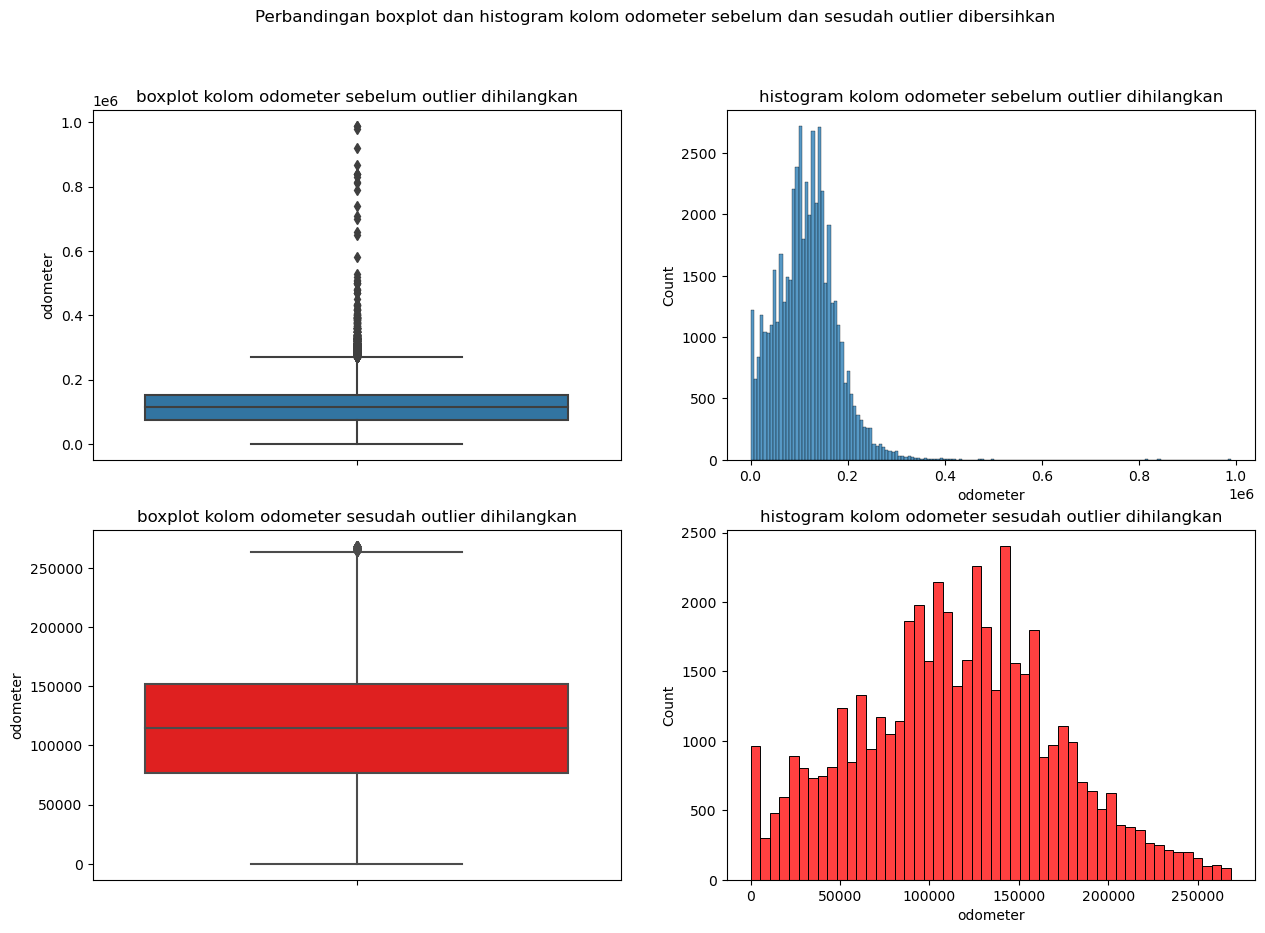

In [43]:
fig, axes = plt.subplots(2,2, figsize = (15, 10))
fig.suptitle('Perbandingan boxplot dan histogram kolom odometer sebelum dan sesudah outlier dibersihkan')
sns.boxplot(ax=axes[0,0], data=cars, y='odometer')
axes[0,0].set_title('boxplot kolom odometer sebelum outlier dihilangkan')
sns.histplot(ax=axes[0,1], data=cars, x='odometer', bins=150)
axes[0,1].set_title('histogram kolom odometer sebelum outlier dihilangkan')
sns.boxplot(ax=axes[1,0], data=cars_clean, y='odometer', color='red')
axes[1,0].set_title('boxplot kolom odometer sesudah outlier dihilangkan')
sns.histplot(ax=axes[1,1], data=cars_clean, x='odometer', bins=50, color='red')
axes[1,1].set_title('histogram kolom odometer sesudah outlier dihilangkan')
plt.show()

Terakhir, perbedaan histogram dan boxplot untuk kolom `odometer` juga terlihat berbeda secara signifikan. Sebelum data outliers dibersihkan, terdapat data-data outliers yang memiliki odometer mobil lebih dari 250000 km, dan data histogram menunjukan bahwa mayoritas mobil yang dijual pada iklan memiliki odometer kurang dari 250000 km, yang menyebabkan boxplot pada sekitar rentan 0 - 250000 km. Setelah data outliers dibersihkan, walaupun masih terdapat outliers pada odometer mobil yang lebih dari 250000 km, outliers dengan nilai yang berbeda jauh dibandingkan dengan nilai boxplot dan whiskers telah berkurang signifikan. Selain itu, distribusi data outliers yang telah dibersihkan yang ditunjukan pada histogram juga terlihat lebih baik.

## Masa Berlaku Iklan 
Setelah data dibersihkan, dilakukan analisis akan kolom `days_listed`. Kolom ini memuat banyak informasi terkait seberapa lama iklan dari mobil - mobil ditayangkan hingga waktu mobil tersebut terjual.

In [44]:
#melakukan identifikasi dari kolom days_listed
cars_clean['days_listed'].describe()

count    48355.000000
mean        39.537814
std         28.207021
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

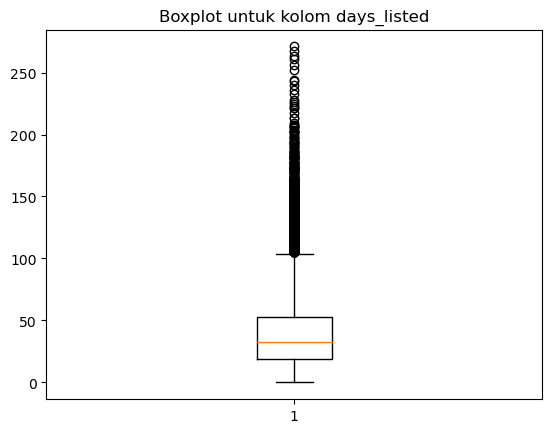

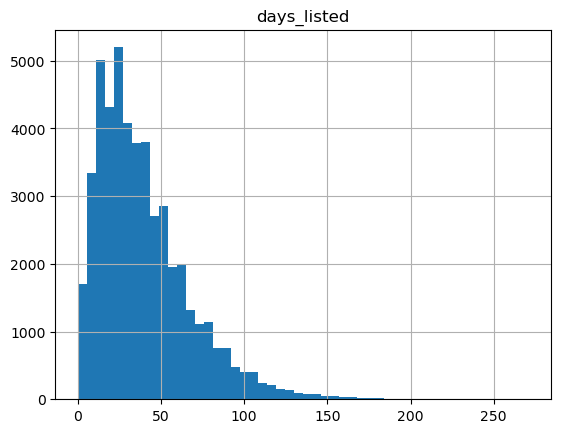

In [45]:
#menggambar grafik boxplot dan histogram pad kolom days_listed
plt.boxplot(cars_clean['days_listed'])
plt.title('Boxplot untuk kolom days_listed')
print()
cars_clean.hist('days_listed', bins=50)
plt.show()

Dari data dengan outliers pada kolom `price`, `age`, dan `odometer` yang telah dihilangkan, dapat terlihat bahwa mobil terjual paling cepat pada 0 hari yang menunjukan bahwa mobil dalam kurang dari 1 hari telah laku, rata - rata mobil laku terjual sekitar 40 hari, dan mobil yang paling lama terjual pada 271 hari. Kurva boxplot menunjukan bahwa terdapat outliers nilai untuk rentang diatas 100 hari, dan histogram menunjukan bahwa mayoritas mobil terjual pada 100 hari setelah iklan ditayangkan.

## Harga Rata-Rata Setiap Jenis Kendaraan

Selanjutnya dilakukan analisis akan jumlah iklan dari masing - masing tipe kendaraan terhadap rata - rata dari harga kendaraan.

In [46]:
cars_group_1 = cars_clean.groupby('type').agg({
    'price': 'mean',
    'model': 'count'
}).rename(columns={
    'price': 'avg_price',
    'model': 'count_type'
}).sort_values(by='count_type', ascending=False)
print(cars_group_1)

                avg_price  count_type
type                                 
sedan         6975.402229       12023
SUV          10441.251533       11907
truck        15145.725635       11102
pickup       15063.710518        6294
coupe        13528.890765        2014
wagon         8975.517928        1506
mini-van      8051.448908        1145
hatchback     6838.702488        1005
van           8846.596220         582
convertible  13046.598240         341
other        10542.137339         233
offroad      14344.049451         182
bus          18107.428571          21


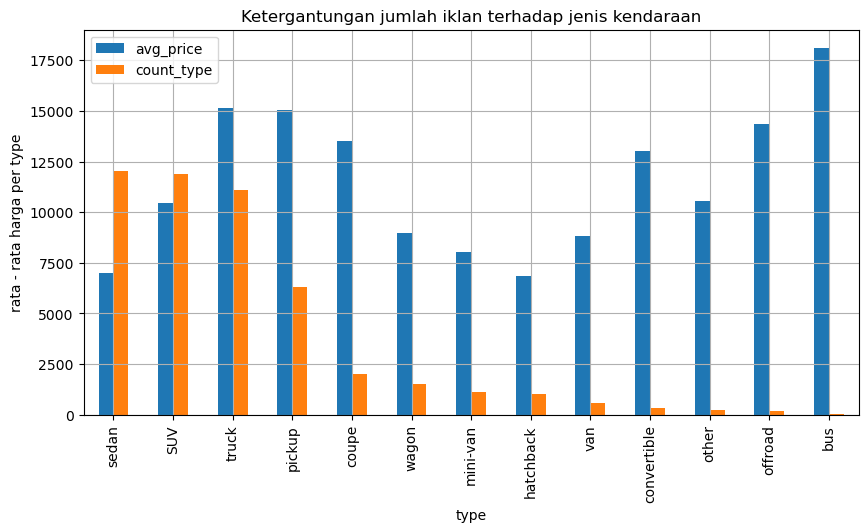

In [47]:
cars_group_1.plot(kind='bar', grid=True, figsize=(10,5))
plt.title('Ketergantungan jumlah iklan terhadap jenis kendaraan')
plt.ylabel('rata - rata harga per type')
plt.show()

Dari kurva diatas, dapat terlihat bahwa sedan adalah mobil yang paling banyak diiklankan. Hal ini lumrah mengingat bahwa mobil sedan adalah mobil yang paling awam ditemui dijalanan, seperti dilansir pada laman berikut [ini](https://www.insuranceproviders.com/what-is-the-most-common-car-in-america/). Diurutan kedua, mobil yang paling awam diiklankan adalah SUV, dan tipe mobil yang paling jarang diiklankan adalah bus dan offroad. Rata - rata harga mobil sedan yang diiklankan memiliki harga paling rendah dibandingkan dengan mobil tipe yang lain, diikuti oleh hatchback dan SUV. Sedangkan mobil yang memiliki rata - rata harga tertinggi adalah bus, truck, dan pickup.

## Faktor Harga

Setelah dilakukan analisis jumlah iklan tipe kendaraan terhadap rata - rata harga kendaraan, dilakukan analisis pengaruh harga kendaraan terhadap 2 tipe kendaraan yang paling banyak diiklankan, yakni sedan dan SUV. 

In [48]:
cars_sedan = cars_clean[cars_clean['type'] == 'sedan'].reset_index(drop=True)
cars_sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,year_posted,age,milage_per_year,condition_number
0,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,3,2,2019,6,18333.333333,4
1,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,1,4,2019,2,40451.500000,3
2,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.500000,3
3,12990,2015,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,12,2018,3,26404.000000,3
4,8990,2012,honda accord,excellent,4,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,3,3,2019,7,15877.428571,3


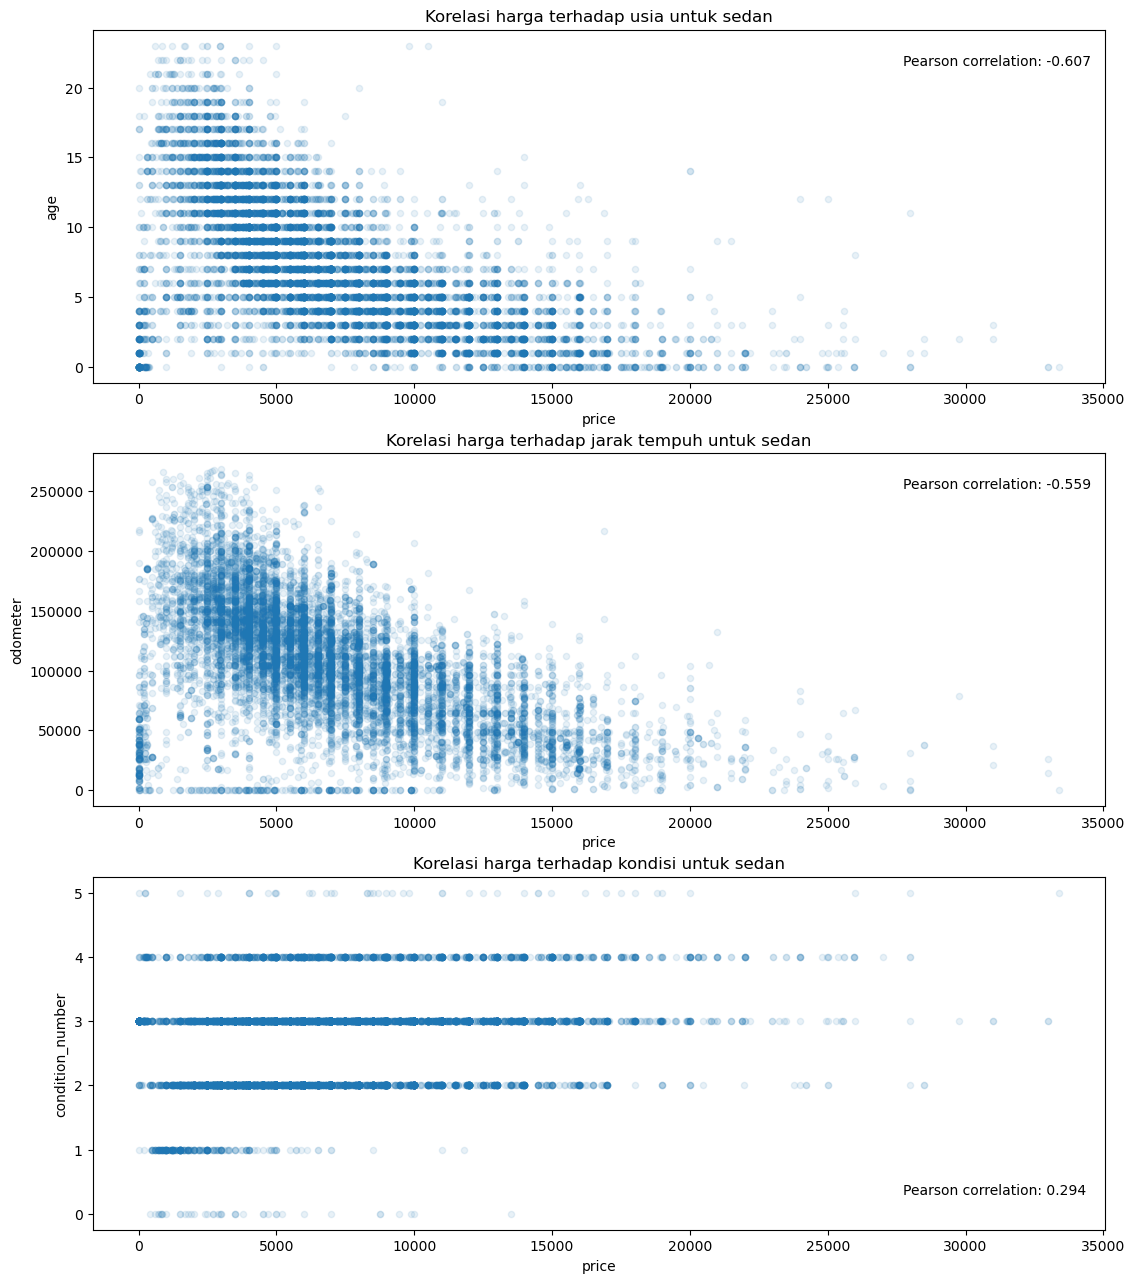

In [49]:
fig, axes = plt.subplots(3, figsize=(15,10))
cars_sedan.plot(kind='scatter', x='price', y='age', ax= axes[0], alpha = 0.1, title='Korelasi harga terhadap usia untuk sedan')
axes[0].annotate(xy=(0.8, 0.9), text='Pearson correlation: {:.3f}'.format(cars_sedan['price'].corr(cars_sedan['age'])), xycoords='axes fraction')
cars_sedan.plot(kind='scatter', x='price', y='odometer', ax= axes[1], alpha = 0.1, title='Korelasi harga terhadap jarak tempuh untuk sedan')
axes[1].annotate(xy=(0.8, 0.9), text='Pearson correlation: {:.3f}'.format(cars_sedan['price'].corr(cars_sedan['odometer'])), xycoords='axes fraction')
cars_sedan.plot(kind='scatter', x='price', y='condition_number', ax= axes[2], alpha = 0.1, title='Korelasi harga terhadap kondisi untuk sedan')
axes[2].annotate(xy=(0.8, 0.1), text='Pearson correlation: {:.3f}'.format(cars_sedan['price'].corr(cars_sedan['condition_number'])), xycoords='axes fraction')
plt.subplots_adjust(bottom=0.1, right=0.8, top=1.3)

Dari kurva scatterplot untuk variabel usia, jarak tempuh, dan kondisi seda, dapat diambil beberapa kesimpulan. Pertama, usia dan jarak tempuh yang dimiliki suatu harga memiliki korelasi negatif terhadap harganya. Artinya, semakin tua dari suatu sedan atau semakin tinggi jarak tempuh dari sedan, maka harga sedan akan semakin murah. Hal ini wajar, mengingat semakin tua suatu kendaraan maka kemungkinan terjadi kerusakan dalam mobil yang tidak dapat dilihat secara langsung akan semakin tinggi, dan semakin tinggi jarak tempuh dari kendaraan maka kerusakan tak kasat mata juga semakin tinggi. Dengan adanya kerusakan tidak terlihat oleh mata secara langsung ini menyebabkan pembeli merasa takut untuk membayar mahal, dikarenakan faktor perawatan, maintance, spareparts, dll. Untuk faktor kondisi, semakin bagus kondisi yang dimiliki oleh mobil sedan maka semakin tinggi harga yang dimiliki nya. Hal ini juga wajar mengingat semakin bagus kondisi mobil maka pembeli merasa bahwa tidak perlu mengeluarkan biaya kembali untuk merawat mobil. Hal ini sesuai dengan artikel [ini](https://www.capitalone.com/cars/learn/managing-your-money-wisely/factors-that-can-affect-used-car-tradein-value/1224). Korelasi usia memiliki tingkat korelasi yang lebih tinggi, dilanjut oleh jarak tempuh dan kondisi.

Selanjutnya dilakukan penganalisisan untuk faktor transmisi dan warna mobil.

In [50]:
cars_sedan['transmission'].value_counts()

automatic    11315
manual         576
other          132
Name: transmission, dtype: int64

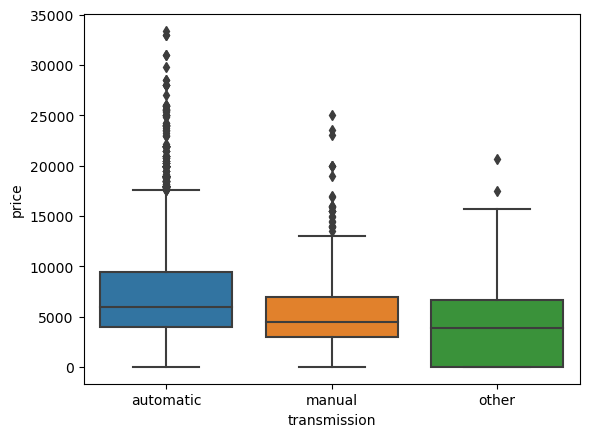

In [51]:
sns.boxplot(x='transmission',y='price', data = cars_sedan)
plt.show()

Untuk transmisi, mobil yang memiliki transmisi automatic memiliki rata - rata harga yang lebih tinggi dibandingkan transmisi manual maupun transmisi yang lain.

In [52]:
cars_sedan['paint_color'].value_counts()

other     2165
silver    2037
black     1757
grey      1611
white     1491
blue      1220
red        936
custom     296
brown      254
green      203
purple      23
yellow      21
orange       9
Name: paint_color, dtype: int64

Karena warna ungu, kuning, dan jingga kurang dari 50 iklan, maka nilai ini tidak valid ketika akan dilakukan analisis, sehingga lebih baik nilai ini dibuang terlebih dahulu. Selain itu, nilai other yang merupakan nilai yang hilang juga akan dihapus.

In [53]:
list_index_color_sedan = cars_sedan['paint_color'].value_counts()[1:-3].index

In [54]:
cars_sedan_filter_color = cars_sedan[cars_sedan['paint_color'].isin(list_index_color_sedan)].reset_index(drop=True)
cars_sedan_filter_color.info()
cars_sedan_filter_color['paint_color'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9805 entries, 0 to 9804
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             9805 non-null   int64         
 1   model_year        9805 non-null   int32         
 2   model             9805 non-null   object        
 3   condition         9805 non-null   object        
 4   cylinders         9805 non-null   int32         
 5   fuel              9805 non-null   object        
 6   odometer          9805 non-null   float64       
 7   transmission      9805 non-null   object        
 8   type              9805 non-null   object        
 9   paint_color       9805 non-null   object        
 10  is_4wd            9805 non-null   bool          
 11  date_posted       9805 non-null   datetime64[ns]
 12  days_listed       9805 non-null   int64         
 13  day_posted        9805 non-null   int64         
 14  week_posted       9805 n

array(['red', 'black', 'white', 'grey', 'silver', 'custom', 'blue',
       'green', 'brown'], dtype=object)

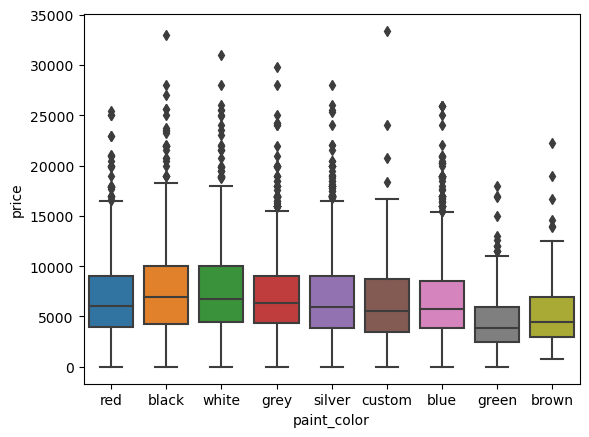

In [55]:
sns.boxplot(x='paint_color',y='price', data = cars_sedan_filter_color)
plt.show()

Setelah dilakukan pemfilteran dan plot data, didapatkan hasil bahwa warna memengaruhi harga mobil sedan. Hal ini terlihat bahwa mobil yang berwarna hitam dan putih memiliki kecenderungan harga yang lebih tinggi dibandingkan dengan warna - warna yang lainnya, sedangkan mobil berwarna hijau dan coklat memiliki kecendurungan harga yang lebih rendah dibandingkan dengan warna - warna lainnya.

Setelah melakukan analisis faktor yang memengaruhi harga untuk mobil sedan, dilakukan pula analisis faktor harga untuk mobil SUV.

In [56]:
cars_suv = cars_clean[cars_clean['type'] == 'SUV'].reset_index(drop=True)
cars_suv.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,week_posted,year_posted,age,milage_per_year,condition_number
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,other,True,2018-06-23,19,5,6,2018,7,20714.285714,2
1,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,18245.500000,3
2,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,other,True,2018-07-16,19,0,7,2018,6,17362.333333,3
3,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,13381.000000,3
4,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,3,1,2019,10,13228.500000,3


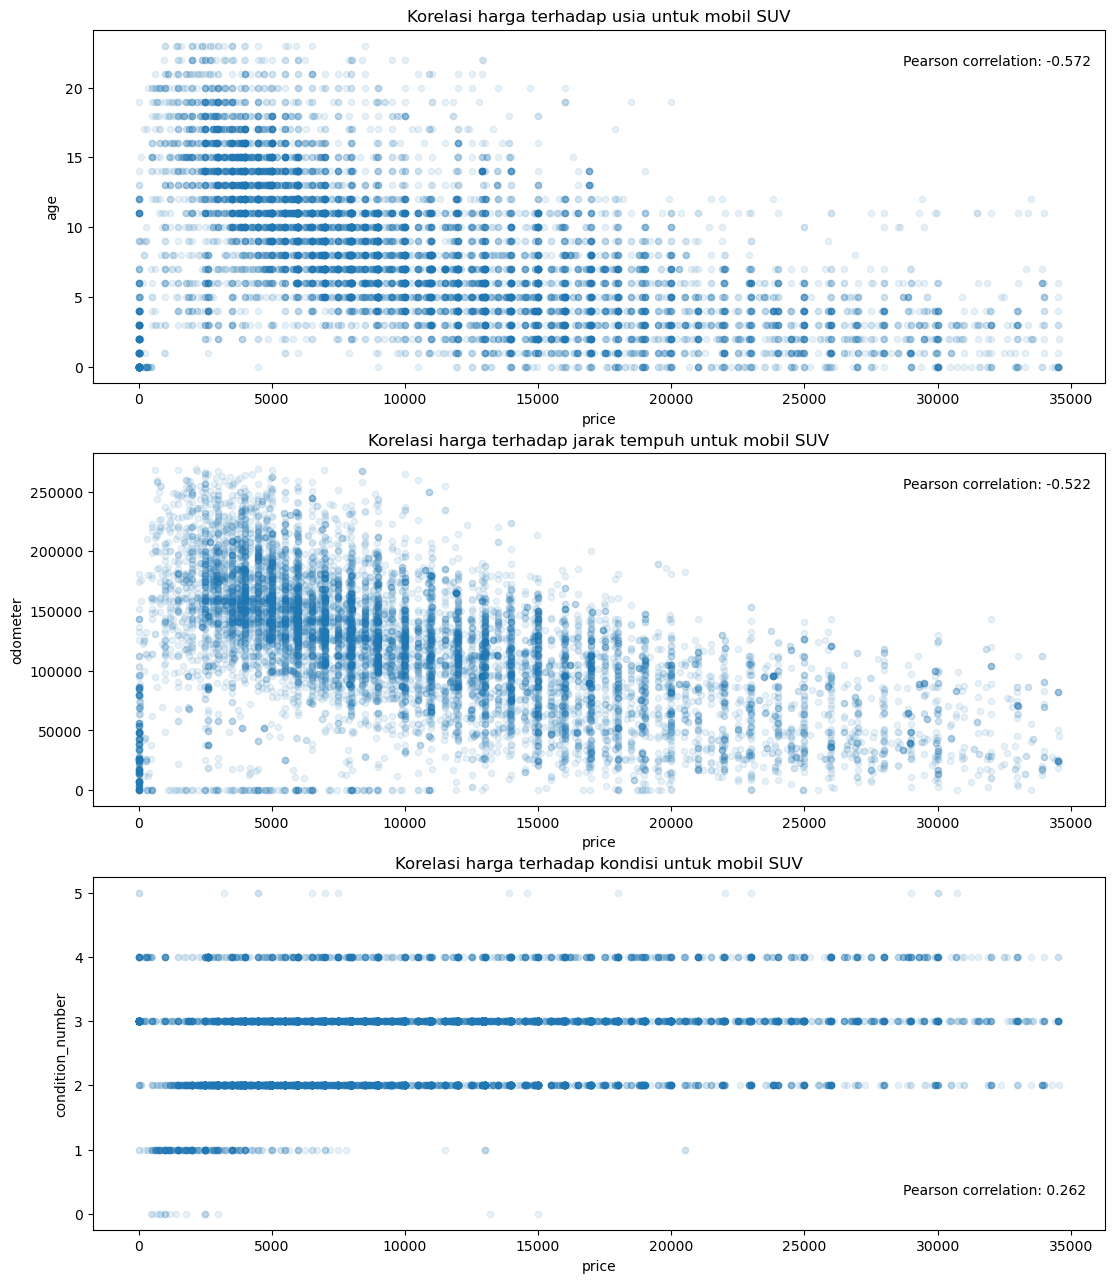

In [57]:
fig, axes = plt.subplots(3, figsize=(15,10))
cars_suv.plot(kind='scatter', x='price', y='age', ax= axes[0], alpha = 0.1, title='Korelasi harga terhadap usia untuk mobil SUV')
axes[0].annotate(xy=(0.8, 0.9), text='Pearson correlation: {:.3f}'.format(cars_suv['price'].corr(cars_suv['age'])), xycoords='axes fraction')
cars_suv.plot(kind='scatter', x='price', y='odometer', ax= axes[1], alpha = 0.1, title='Korelasi harga terhadap jarak tempuh untuk mobil SUV')
axes[1].annotate(xy=(0.8, 0.9), text='Pearson correlation: {:.3f}'.format(cars_suv['price'].corr(cars_suv['odometer'])), xycoords='axes fraction')
cars_suv.plot(kind='scatter', x='price', y='condition_number', ax= axes[2], alpha = 0.1, title='Korelasi harga terhadap kondisi untuk mobil SUV')
axes[2].annotate(xy=(0.8, 0.1), text='Pearson correlation: {:.3f}'.format(cars_suv['price'].corr(cars_suv['condition_number'])), xycoords='axes fraction')
plt.subplots_adjust(bottom=0.1, right=0.8, top=1.3)

Dari grafik diatas dapat terlihat bahwa usia, jarak tempuh, dan kondisi juga memengaruhi harga dari mobil SUV yang diiklankan. Dapat terlihat bahwa usia mobil SUV yang semakin tua menyebabkan harga mobil cenderung turun. Jarak tempuh mobil SUV yang tinggi ketika diiklankan juga menyebabkan harga mobil yang cenderung turun. Terakhir, mobil dengan kualitas yang lebih baik memberikan harga mobil yang cenderung lebih tinggi dibandingkan mobil SUV yang memiliki kondisi yang lebih buruk.

In [58]:
cars_suv['transmission'].value_counts()

automatic    11289
manual         460
other          158
Name: transmission, dtype: int64

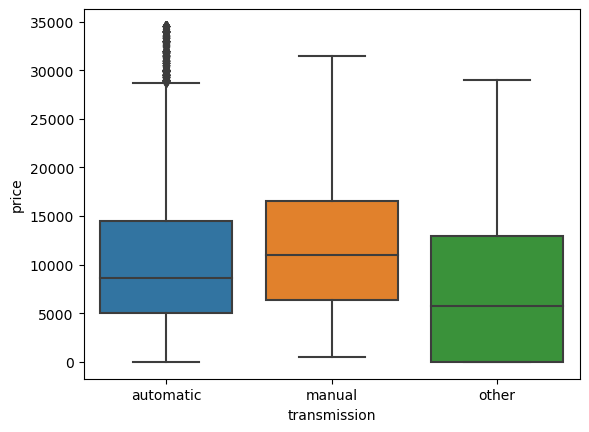

In [59]:
sns.boxplot(x='transmission',y='price', data = cars_suv)
plt.show()

Dari kurva boxplot untuk pengaruh harga terhadap transmisi mobil SUV, dapat terlihat bahwa mobil yang memiliki transmisi manual memiliki kecendurungan harga yang lebih tinggi dibandingkan dengan mobil SUV yang memiliki transmisi automatic maupun yang lainnya. 

In [60]:
cars_suv['paint_color'].value_counts()

other     2143
black     2097
white     1872
silver    1531
grey      1147
blue      1010
red        874
green      417
brown      352
custom     299
orange      81
yellow      45
purple      39
Name: paint_color, dtype: int64

Karena warna ungu dan kuning kurang dari 50 iklan, maka nilai ini tidak valid ketika akan dilakukan analisis, sehingga lebih baik nilai ini dibuang terlebih dahulu. Selain itu, nilai other yang merupakan nilai yang hilang juga akan dihapus.

In [61]:
list_index_color_suv = cars_suv['paint_color'].value_counts()[1:-2].index

In [62]:
cars_suv_filter_color = cars_suv[cars_suv['paint_color'].isin(list_index_color_suv)].reset_index(drop=True)
cars_suv_filter_color.info()
cars_suv_filter_color['paint_color'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9680 entries, 0 to 9679
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             9680 non-null   int64         
 1   model_year        9680 non-null   int32         
 2   model             9680 non-null   object        
 3   condition         9680 non-null   object        
 4   cylinders         9680 non-null   int32         
 5   fuel              9680 non-null   object        
 6   odometer          9680 non-null   float64       
 7   transmission      9680 non-null   object        
 8   type              9680 non-null   object        
 9   paint_color       9680 non-null   object        
 10  is_4wd            9680 non-null   bool          
 11  date_posted       9680 non-null   datetime64[ns]
 12  days_listed       9680 non-null   int64         
 13  day_posted        9680 non-null   int64         
 14  week_posted       9680 n

array(['black', 'blue', 'red', 'white', 'silver', 'grey', 'green',
       'brown', 'orange', 'custom'], dtype=object)

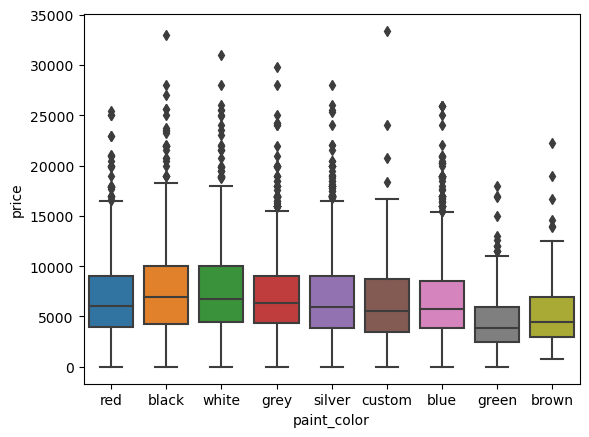

In [63]:
sns.boxplot(x='paint_color',y='price', data = cars_sedan_filter_color)
plt.show()

Setelah dilakukan pemfilteran dan plot data, didapatkan hasil bahwa warna memengaruhi harga mobil SUV seperti mobil sedan. Hal ini terlihat bahwa mobil yang berwarna hitam dan putih memiliki kecenderungan harga yang lebih tinggi dibandingkan dengan warna - warna yang lainnya, sedangkan mobil berwarna hijau dan coklat memiliki kecendurungan harga yang lebih rendah dibandingkan dengan warna - warna lainnya.

## Kesimpulan Umum


Telah dilakukan pemrosesan data, mengisi nilai - nilai yang hilang, menghilangkan nilai - nilai outliers, dan mempelajari berapa lama iklan mobil ditayangkan dan faktor - faktor yang memengaruhi harga mobil. Dari kegiatan tersebut, dapat diambil beberapa kesimpulan:
- Pada dataset terdapat banyak data yang hilang, dengan kolom `is_4wd` memiliki nilai yang hilang sebanyak lebih dari 50% dan `paint_color` sebanyak lebih dari 18%. Nilai - nilai hilang ini bersifat acak, yang kemungkinan bahwa nilai ini disebabkan karena human error. Sehingga kedepannya bisa dilakukan diskusi terkait pengisian nilai yang hilang ini, khususnya faktor - faktor yang dapat digunakan untuk menganalisa harga mobil seperti odometer dan warna mobil.
- Tidak ada nilai duplikat pada dataset ini
- Terdapat outlier khususnya pada kolom `age`, `odometer`, dan `price`. Outlier ini bisa disebabkan beberapa hal, seperti pengisian data yang salah, memang terdapat mobil yang memiliki umur dan jarak tempuh diluar rata - rata, dll.
- Setelah data outlier dihilangkan, didapatkan nilai bahwa rata - rata diperlukan waktu sekitar 40 hari agar mobil yang diiklankan dapat terjual.
- Mobil sedan dan SUV merupakan jenis mobil yang paling banyak diiklankan pada Crankshaft List dengan mobil tipe offroad dan bus adalah jenis mobil yang paling sedikit diiklankan. Mobil sedan dan hatchback adalah jenis mobil yang memiliki rata - rata harga yang paling murah dibandingkan dengan mobil jenis lainnya, dengan mobil tipe bus dan truck adalah mobil yang memiliki rata - rata harga paling tinggi dibandingkan mobil tipe lainnya.
- Harga mobil sedan dan SUV ditentukan oleh beberapa jenis faktor. Faktor - faktor tersebut adalah: usia mobil yang semakin tua akan cenderung semakin rendah, jarak tempuh mobil yang semakin tinggi akan cenderung semakin rendah, kondisi mobil yang semakin bagus akan semakin tinggi harganya, transmisi mobil automatic untuk sedan memiliki rata - rata harga lebih tinggi dibandingkan transmisi mobil lainnya sedangkan transmisi mobil manual untuk SUV memiliki rata - rata harga yang lebih tinggi dibandingkan transmisi mobil jenis lainnya, serta warna hitam dan putih cenderung memiliki harga mobil yang lebih tinggi dibandingkan dengan jenis warna lainnya.